# Tutorial 2: Clasificación

Las principales partes que componen este tutorial son:
1. Cargar y explorar los datos.
2. Separar datos en train y test.
4. Entrenar y evaluar un modelo.
3. Seleccionar hiperparámetros.

## Preámbulo

Las celdas de código en este notebook sólo aceptan código en Python, pero hay ciertas "palabras clave" que permiten hacer otras cosas. Por ejemplo, con `!` podemos llamar a un comando del sistema.

En este caso, vamos a llamar a `pip` (Package Installer for Python) para instalar las librerías que vamos a usar en este laboratorio. 

Haz click en la celda para seleccionarla y luego presiona **Ctrl+Enter** o **Shift+Enter** para ejecutarla.

In [ ]:
!pip install scikit-learn pandas numpy matplotlib

## Cargar datos

Usaremos el dataset _iris_ disponible en scikit-learn.

![iris dataset](https://sebastianraschka.com/images/blog/2014/intro_supervised_learning/iris_petal_sepal_1.png)

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

# la variable iris es un objeto con varios atributos
# podemos verlos escribiendo "iris." y luego TAB para que Colab nos muestre las 
# posibles completaciones. Ejemplo: print(iris.DESCR)

# mostramos las primeras 10 filas
iris.data[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
# listamos los atributos

iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# listamos las clases

iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# target_names son los nombres de las clases
# clase 0 corresponde a 'setosa'
# clase 1 corresponde a 'versicolor'
# clase 2 corresponde a 'virginica'

iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Usando la librería `pandas` para manipular datos podemos generar una vista más "agradable" de los datos:



In [ ]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['clase'] = iris.target_names[iris.target]

# df.sample muestrea n=10 filas
df.sample(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clase
129,7.2,3.0,5.8,1.6,virginica
14,5.8,4.0,1.2,0.2,setosa
58,6.6,2.9,4.6,1.3,versicolor
23,5.1,3.3,1.7,0.5,setosa
56,6.3,3.3,4.7,1.6,versicolor


Podemos visualizar los datos usando una _scatterplot matrix_ (o matriz de dispersión) para ver cómo se
comportan los atributos:

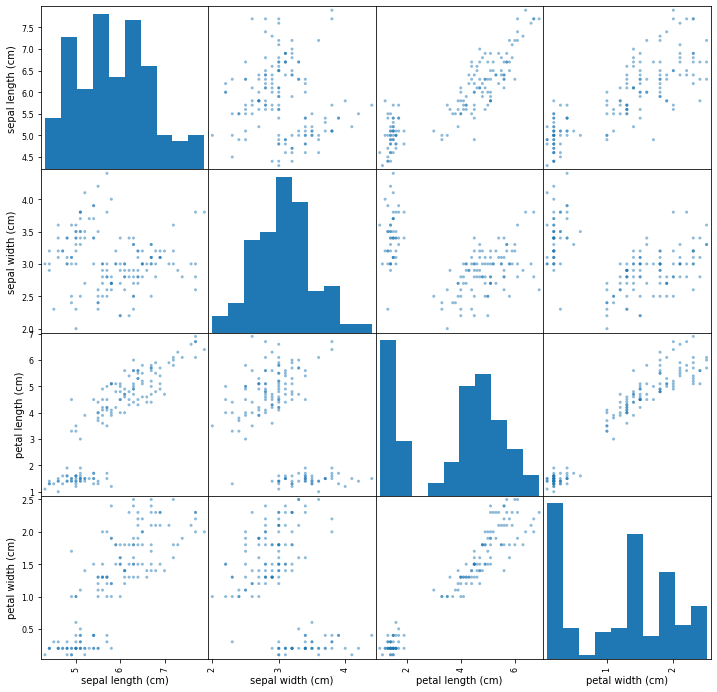

In [ ]:
fig = pd.plotting.scatter_matrix(df, figsize=(12, 12))

Una notación estándar es llamar $X$ a la matriz que contiene a los datos e $y$ al vector que contiene el valor de la clase para cada fila en $X$. 

Es decir, $X$ tiene $N$ filas y $p$ columnas (donde $p$ es la cantidad de atributos) e $y$ es un vector de $N$ valores.

In [ ]:
# nos referiremos con 'X' a los datos o características, y con 'y' a las clases
# X es una 'matriz' (es una lista de listas de valores asociados a atributos)
# y es un vector (una lista de valores)

X = iris.data 
y = iris.target

print("X, características de 10 flores: \n", X[:10]) 
print("y, clases para cada instancia de X: \n", y[:10])  

X, características de 10 flores: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
y, clases para cada instancia de X: 
 [0 0 0 0 0 0 0 0 0 0]


## Separar datos en train y test

**IMPORTANTE**: En este punto debemos crear nuestros conjuntos de entrenamiento y de test.

Tenemos dos opciones:

1. Hacemos un *muestreo aleatorio* de los datos para separarlos en train y test.
2. Hacemos un *muestreo estratificado* con respecto a la clase. Es decir, nos aseguramos que tanto train y test tengan la misma distribución de clases.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40, stratify=y)

El método `train_test_split` retorna cuatro listas, los correspondientes a train y a test. Es decir, para el entrenamiento se usará **X_train** que tiene los features de entrenamiento e **y_train** que son sus respectivas clases. Así mismo, para probar con nuevos datos (testing), usaremos **X_test** como los features de entrada e **y_test** como las clases respectivas (para evaluar el desempeño de nuestro modelo). 

* El parámetro **test_size** nos permite regular la fracción de los datos que irán a test; en este caso 33% del dataset completo. 

* El parámetro **random_state** nos permite fijar la semilla para tener resultados consistentes (genera la misma partición de datos). Si ejecutamos el método varias veces con la misma semilla, nos mostrará los mismos resultados siempre. 

* El parámetro **stratify** recibe un arreglo con la distribución de clases, y el método intenta mantener esa misma distribución en las listas resultantes. Si no hicieramos esto, podríamos, por ejemplo, tener muchos datos de una clase en el set de entrenamiento. 

In [ ]:
pd.Series(y_test).value_counts()

1    17
2    17
0    16
dtype: int64

# Baseline

Lo primero que debemos considerar antes de entrenar o decidir con cuál modelo nos vamos a quedar es cuál es el "piso mínimo" que podemos esperar.

Un *baseline* es un modelo simple, básico, que incluso puede no aprender nada de los datos, pero que nos sirve para saber cuál es el rendimiento mínimo que podemos alcanzar con los datos.

En el siguiente código vamos a declarar un algoritmo de aprendizaje "dummy" o "tonto". En este caso, el modelo entrenado va a predecir cualquiera de las tres clases al azar.



In [ ]:
from sklearn.dummy import DummyClassifier

# declaramos el modelo dummy
# hasta ahora no hemos hecho nada con los datos
dc = DummyClassifier(strategy="uniform", random_state=42)

Ahora entrenamos un modelo. **IMPORTANTE**: El modelo se entrena con los datos de entrenamiento.

In [ ]:
# este método altera el modelo
dc.fit(X_train, y_train)

DummyClassifier(random_state=42, strategy='uniform')

Ahora vemos cómo le fue a este modelo con los datos de test.

Le vamos a pasar los datos de prueba al modelo, el cual entregará una _predicción_ por cada uno de las filas de prueba.

In [ ]:
y_pred = dc.predict(X_test)

In [ ]:
y_pred

array([2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0,
       0, 2, 1, 0, 1, 1])

Finalmente comparamos el resultado de la predicción, `y_pred` con la respuesta correcta, `y_test`:

In [ ]:
# podemos ver el accuracy, precision, recall por cada clase
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

accuracy_score(y_test, y_pred)

0.42

In [ ]:
# (ver https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin
# diferencia entre macro y micro average)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      0.31      0.32        16
           1       0.47      0.41      0.44        17
           2       0.45      0.53      0.49        17

    accuracy                           0.42        50
   macro avg       0.42      0.42      0.42        50
weighted avg       0.42      0.42      0.42        50



# Entrenar un modelo

Entrenaremos un árbol de decisión con los datos:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42, criterion='entropy')
clf = clf.fit(X_train, y_train)

In [ ]:
# vemos cómo le fue

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      1.00      0.94        17
           2       1.00      0.88      0.94        17

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



Bastante mejor que al baseline.

Podemos ver el árbol resultante:

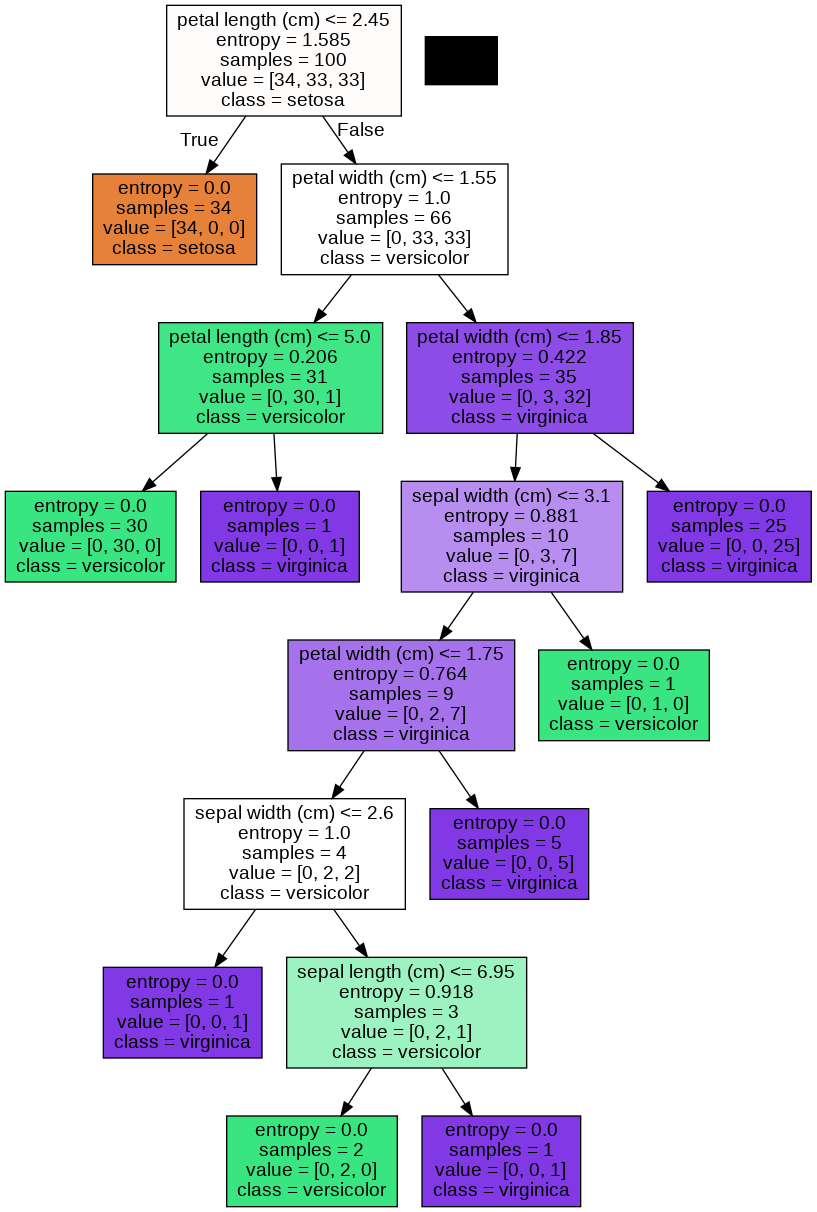

In [ ]:
import pydotplus 
from IPython.display import Image
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf,
                           feature_names=iris.feature_names, 
                           class_names=iris.target_names, 
                           filled=True, 
                           out_file=None) 

graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

# Evaluar un modelo 

Arriba usamos holdout (separar los datos en train y test) para evaluar el clasificador. 

Recuerda que un problema de holdout es que podemos tener buena o mala suerte y elegir una muestra muy particular cuando tenemos pocos datos.

Por ejemplo, ¿qué pasa si elegimos otra partición train/test?






In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7, stratify=y)

clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.88      0.88      0.88        17
           2       0.88      0.88      0.88        16

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



Podemos ver que bajamos de un 96% a un 92% de accuracy. No es mucho, pero ilustra cómo puede cambiar el resultado si cambiamos la muestra.

Una forma más consistente de determinar el error fuera de la muestra es usando cross-validation.

## Cross-validation

Recuerda que CV divide los datos en $k$ partes iguales: entrena con $k-1$ partes y evalúa con la parte restante, y esto lo repite $k$ veces (una vez por cada parte a evaluar).
Esta técnica se conoce como $k$-folds cross-validation.

Vamos a hacer cross-validation de forma "manual" para ver cómo se comporta.

![](https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg)


**NOTA**: Recuerda que CV puede usarse para dos propósitos muy relacionados entre sí:

1. Tener una estimación del error fuera de la muestra (error de test), como haremos en este ejemplo (en este ejemplo usamos todo `X` e `y`).

2. Elegir un modelo o ajustar parámetros de éste (para eso usamos `X_train` e `y_train`).

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np

clf = DecisionTreeClassifier(random_state=42)
scoring = ['accuracy', 'f1_macro']

cv_results = cross_validate(clf,
                            X, 
                            y, 
                            cv=10, 
                            scoring=scoring, 
                            return_train_score=True)

print('Promedio Accucary:', np.mean(cv_results['test_accuracy']))
print('Promedio F1-score:', np.mean(cv_results['test_f1_macro']))

#Si quisieramos mostrar el resultado de cada k-fold, deberiamos quitar la 
#funcion np.mean la cual retorna el promedio. Esto mostraría una lista con el resultado de cada fold

Promedio Accucary: 0.9533333333333334
Promedio F1-score: 0.952996632996633


## Seleccionar hiperparámetros

Los hiperparámetros son parámetros que no se aprenden directamente dentro de los estimadores. En scikit-learn se pasan como argumentos al constructor de las clases, por ejemplo, cuál kernel usar para Support Vector Classifier, o qué criterio para Decision Tree, etc. Es posible y recomendable buscar en el espacio de hiperparámetros la mejor alternativa.

Tenga en cuenta que es común que un pequeño subconjunto de esos parámetros pueda tener un gran impacto en el rendimiento predictivo o de cálculo del modelo, mientras que otros pueden dejar sus valores predeterminados. Se recomienda leer la documentación de la clase de estimador para obtener una mejor comprensión de su comportamiento esperado.

**GridSearchCV** considera exhaustivamente todas las combinaciones de parámetros. GridSearchCV recibe un `estimador`, `param_grid` (un diccionario o una lista de diccionarios con los nombres de los parámetros a probar como keys y una lista de los valores a probar), `scoring` una o varias funciones de puntuación (score) para evaluar cada combinación de parámetros (opciones válidas: https://scikit-learn.org/stable/modules/model_evaluation.html), y `cv` una extrategia para hacer validación cruzada.

In [ ]:
DecisionTreeClassifier?

In [ ]:
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'criterion': ['gini','entropy'], 
                    'max_depth': [2, 3, 5, 10]} 

#Construir el clf con GridSearch y luego entrenar
clf = GridSearchCV(DecisionTreeClassifier(), 
                   param_grid=tuned_parameters, 
                   cv=5,
                   scoring='f1_macro')

clf.fit(X_train, y_train)

print("Mejor combinación de parámetros:")
print(clf.best_params_)
 
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Mejor combinación de parámetros:
{'criterion': 'entropy', 'max_depth': 10}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.88      0.88      0.88        17
           2       0.88      0.88      0.88        16

    accuracy                           0.92        50
   macro avg       0.92      0.92      0.92        50
weighted avg       0.92      0.92      0.92        50



## Medidas de evaluación

¿Qué pasa cuando tenemos clases desbalanceadas? Por ejemplo, si tenemos dos clases, y están en relación 9:1, ¿puede pensar en un clasificador que tenga al menos 90% de accuracy?

Podemos hacer un análisis más fino del rendimiento por clase usando más medidas de evaluación. Entre las más importantes se cuentan **Precision** y **Recall** (o Recuperación).

$$Precision = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP+FN}$$

Nota que estas medidas son para una clase en particular. La medida para todo el dataset puede ser el promedio de la medida para cada clase.

Supongamos que tenemos varias clases, pero nos queremos enfocar en una en particular, digamos $c$:

- $TP$ corresponde a los True Positive, o Verdaderos Positivos, es decir, los aciertos del clasificador: cuando clasificamos una observación correctamente como $c$.
- $FP$, o False Positive, es cuando clasificamos incorrectamente una observación como $c$, cuando en verdad no lo era.
- $TN$, o True Negative, cuando clasificamos correctamente algo que no es $c$
- $FN$, o False Negative, cuando clasificamos incorrectamente algo que no es $c$


Otra forma de entender Precision y Recall al clasificar una clase $c$ es como sigue: 

\begin{equation}
    \text{Precision}_c = \frac{\text{#(observations correctly classified as } c \text{)}}{ \text{#(observations classified as } c \text{)} }
\end{equation}

\begin{equation}
    \text{Recall}_c = \frac{\text{#(observations correctly classified as } c \text{)}}{ \text{#(observations of class } c\text{)} } 
\end{equation}


Adicionalmente defimos la _matriz de confusión_ para observar los errores del clasificador:



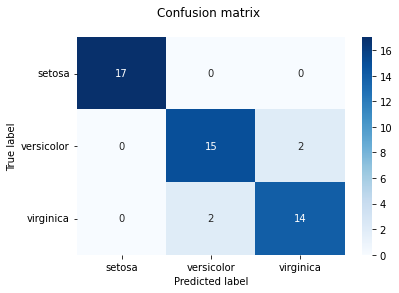

In [ ]:
## EJECUTAR ESTE BLOQUE

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred) 

classes = iris.target_names[unique_labels(y_test, y_pred)]
df = pd.DataFrame(cm, index=classes, columns=classes)

g = sns.heatmap(df, annot=True, cmap="Blues")
g.set_yticklabels(g.get_yticklabels(), rotation = 0)

plt.title('Confusion matrix \n')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.autoscale()

# En conclusión

El flujo usual a la hora de entrenar un clasificador es el siguiente:

1. Tener datos. Verificar la fuente de los datos, la existencia de sesgos.
2. Separar datos en train y test set.
3. Realizar preprocesamiento y limpieza de datos en ambos sets, **de manera independiente**.
4. Determinar hiperparámetros del clasificador usando un conjunto de validación (holdout) o usando cross-validation.
5. Evaluar en el test set para tener una estimación del rendimiento real del clasificador.
6. Para el modelo final, usar todos los datos disponibles.

# Referencias

Documentación de scikit-learn. http://scikit-learn.org/stable/index.html

Tutoriales scikit-learn: https://scikit-learn.org/stable/tutorial/index.html, https://scikit-learn.org/stable/auto_examples/index.html

Tutorial scikit-learn de árboles de decisión. https://scikit-learn.org/stable/modules/tree.html#classification


Precision y Recall. https://en.wikipedia.org/wiki/Precision_and_recall

WEKA (un programa visual con clasificadores y otras herramientas para ML). https://www.cs.waikato.ac.nz/ml/weka/

Curso de Data Mining con WEKA. https://www.cs.waikato.ac.nz/ml/weka/mooc/dataminingwithweka/